In [1]:
!pip install pandas 
!pip install mysql-connector-python
!pip install numpy 
!pip install matplotlib
!pip install seaborn 

In [8]:
import pandas as pd
data=pd.read_csv("Regulatory Affairs of Road Accident Data 2020 India.csv")
data.head()

Million Plus Cities   Cause category        Cause Subcategory  \
0                Agra  Traffic Control  Flashing Signal/Blinker   
1                Agra  Traffic Control  Flashing Signal/Blinker   
2                Agra  Traffic Control  Flashing Signal/Blinker   
3                Agra  Traffic Control  Flashing Signal/Blinker   
4                Agra  Traffic Control  Flashing Signal/Blinker   

         Outcome of Incident  Count  
0         Greviously Injured    0.0  
1               Minor Injury    0.0  
2             Persons Killed    0.0  
3              Total Injured    0.0  
4  Total number of Accidents    0.0

In [9]:
data.shape

(9550, 5)

In [10]:
data.describe()

Count
count  9547.000000
mean    103.627632
std     275.189303
min       0.000000
25%       0.000000
50%      12.000000
75%      70.500000
max    3148.000000

In [11]:
columns = list(data)
columns

['Million Plus Cities',
 'Cause category',
 'Cause Subcategory',
 'Outcome of Incident',
 'Count']

In [12]:
data.isnull().any()


Million Plus Cities    False
Cause category         False
Cause Subcategory      False
Outcome of Incident    False
Count                   True
dtype: bool

In [13]:
data.isnull().sum()


Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64

In [14]:
data.dropna(inplace=True)

In [15]:
data.shape


(9547, 5)

In [16]:
data.dtypes


Million Plus Cities     object
Cause category          object
Cause Subcategory       object
Outcome of Incident     object
Count                  float64
dtype: object

In [17]:
data.head()

Million Plus Cities   Cause category        Cause Subcategory  \
0                Agra  Traffic Control  Flashing Signal/Blinker   
1                Agra  Traffic Control  Flashing Signal/Blinker   
2                Agra  Traffic Control  Flashing Signal/Blinker   
3                Agra  Traffic Control  Flashing Signal/Blinker   
4                Agra  Traffic Control  Flashing Signal/Blinker   

         Outcome of Incident  Count  
0         Greviously Injured    0.0  
1               Minor Injury    0.0  
2             Persons Killed    0.0  
3              Total Injured    0.0  
4  Total number of Accidents    0.0

In [18]:
data['Million Plus Cities'].value_counts()

Million Plus Cities
Agra                    191
Ahmedabad               191
Allahabad(Prayagraj)    191
Amritsar                191
Asansol Durgapur        191
Aurangabad              191
Bengaluru               191
Bhopal                  191
Chandigarh              191
Chennai                 191
Coimbatore              191
Delhi                   191
Dhanbad                 191
Faridabad               191
Ghaziabad               191
Hyderabad               191
Indore                  191
Jabalpur                191
Mumbai                  191
Jaipur                  191
Jamshedpur              191
Jodhpur                 191
Kannur                  191
Kanpur                  191
Khozikode               191
Kochi                   191
Kolkata                 191
Kollam                  191
Kota                    191
Lucknow                 191
Ludhiana                191
Madurai                 191
Mallapuram              191
Meerut                  191
Surat                   191


In [19]:
data['Cause category'].value_counts()

Cause category
Road Features               2000
Impacting Vehicle/Object    1797
Junction                    1500
Traffic Control             1500
Traffic Violation           1500
Weather                     1250
Name: count, dtype: int64

In [20]:
data['Cause Subcategory'].value_counts()

Cause Subcategory
Others                                              1450
Flashing Signal/Blinker                              250
Police Controlled                                    250
Stop Sign                                            250
Traffic Light Signal                                 250
Uncontrolled                                         250
Four arm Junction                                    250
Round about Junction                                 250
Staggered Junction                                   250
T                                                    250
Y                                                    250
Driving on Wrong side                                250
Drunken Driving/ Consumption of alcohol and drug     250
Jumping Red Light                                    250
Over                                                 250
Use of Mobile Phone                                  250
Bridge                                               250
Culvert      

In [21]:
data['Outcome of Incident'].value_counts()

Outcome of Incident
Total number of Accidents    2000
Greviously Injured           1999
Minor Injury                 1999
Persons Killed               1999
Total Injured                1550
Name: count, dtype: int64

In [22]:
data['Count'].value_counts()

Count
0.0       2578
1.0        369
2.0        318
3.0        259
4.0        212
          ... 
971.0        1
1065.0       1
564.0        1
517.0        1
1162.0       1
Name: count, Length: 800, dtype: int64

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [24]:
data.columns


Index(['Million Plus Cities', 'Cause category', 'Cause Subcategory',
       'Outcome of Incident', 'Count'],
      dtype='object')

In [25]:
mydb=mysql.connector.connect(host="localhost", username="root", password="Haari@9928", database="RoadAccidents")

In [26]:
cur=mydb.cursor()

                                            # Finding out Total accidents in India

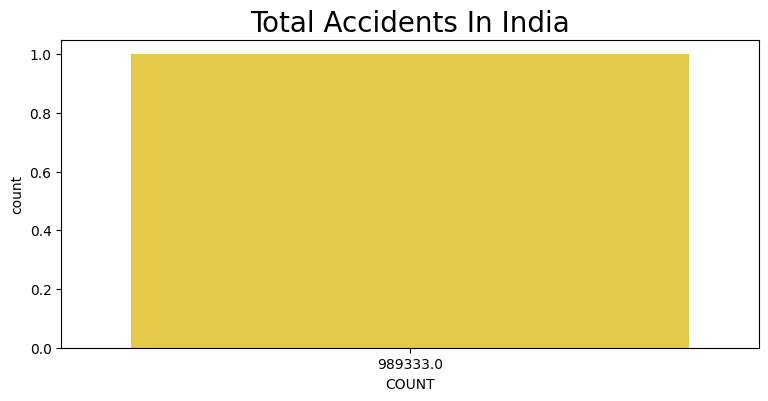

In [38]:
query = """ SELECT SUM(Count) AS total_accidents FROM road_accident """
cur.execute(query)
data=cur.fetchall()
df= pd.DataFrame(data, columns = ["Count"])
plt.figure(figsize = (9, 4))
sns.countplot(x=df["Count"], color= '#ffd92f')
plt.xlabel('COUNT')
plt.title("Total Accidents In India", fontsize=20)
plt.show()


                                            # Finding out Total Accidents by City

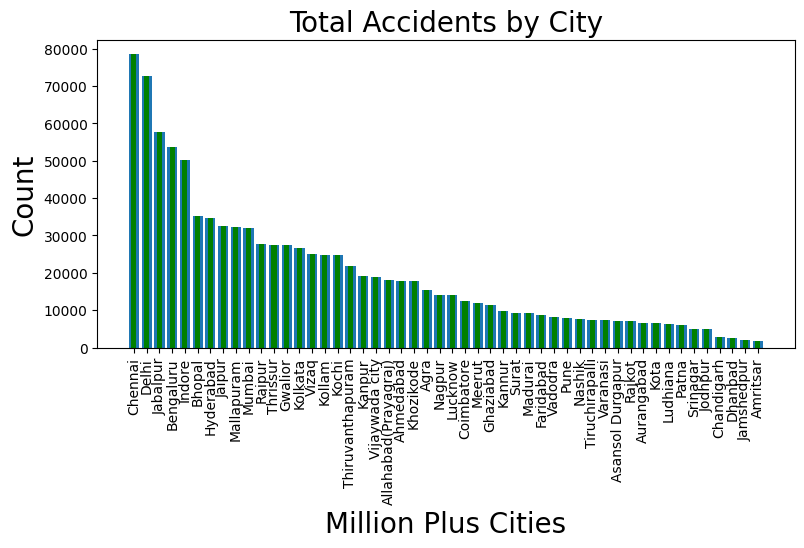

In [30]:
query = """ SELECT `Million Plus Cities`, SUM(`Count`) AS total
            FROM road_accident
            GROUP BY `Million Plus Cities`
            ORDER BY total DESC
        """
cur.execute(query)
data=cur.fetchall()
df= pd.DataFrame(data, columns = ["Million Plus Cities", "Count"])
plt.figure(figsize = (9, 4))
plt.bar(df["Million Plus Cities"], df["Count"])
plt.xlabel("Million Plus Cities", fontsize = 20)
plt.ylabel("Count", fontsize =20)
plt.title("Total Accidents by City", fontsize=20)
plt.bar(df["Million Plus Cities"], df["Count"], width=0.4, color= "g")
plt.xticks(rotation = 90)
plt.show()


                                      # Finding out Accidents by cause category

In [35]:
query = """  SELECT `Cause Category`, SUM(`Count`) AS total
             FROM road_accident
             GROUP BY `Cause Category`
             ORDER BY total DESC
        """
cur.execute(query)
data=cur.fetchall()
df= pd.DataFrame(data, columns = ["Cause Category", "Count"])
plt.figure(figsize = (9, 4))
plt.plot(df["Cause Category"], df["Count"], color='#e78ac3')
plt.xlabel("Cause Category", fontsize = 20)
plt.ylabel("Count", fontsize =20)
plt.title("Accidents by cause category", fontsize=20)
plt.show()

                                          # Finding out Top 5 most common cause subcategories

In [32]:
query = """ SELECT `Cause Subcategory`, SUM(`Count`) AS total
            FROM road_accident
            GROUP BY `Cause Subcategory`
            ORDER BY total DESC
            LIMIT 5
        """
cur.execute(query)
data=cur.fetchall()
plt.figure(figsize = (9, 4))
df= pd.DataFrame(data, columns = ["Cause Subcategory", "Count"])
plt.bar(df["Cause Subcategory"], df["Count"], color='#ffd92f')
plt.xlabel("Cause Subcategory", fontsize = 20)
plt.ylabel("Count", fontsize =20)
plt.title("Top Cause Subcategories", fontsize=20)
plt.show()

                                      # Finding out Outcome of Incident across India

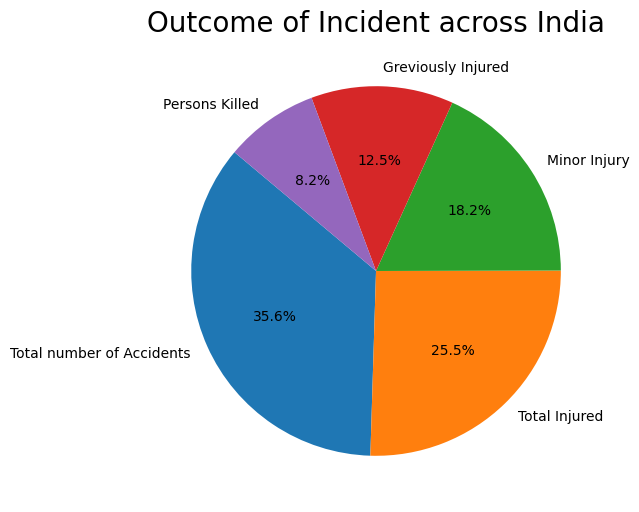

In [23]:
query = """  SELECT `Outcome of Incident`, SUM(`Count`) AS total
             FROM road_accident
             GROUP BY `Outcome of Incident`
             ORDER BY total DESC
        """
cur.execute(query)
data=cur.fetchall()
df= pd.DataFrame(data, columns = ["Outcome of Incident", "Count"])
plt.figure(figsize=(6, 6))
plt.pie(df['Count'], labels=df['Outcome of Incident'], autopct='%1.1f%%', startangle=140)
plt.title("Outcome of Incident across India", fontsize=20)
plt.axis=("equal")
plt.show()

                             # Finding out City-wise Persons Killed count or number of deaths 

In [26]:
query = """ SELECT `Million Plus Cities`, SUM(`Count`) AS deaths
            FROM road_accident
            WHERE `Outcome of Incident` LIKE '%Persons Killed%'
            GROUP BY `Million Plus Cities`
            ORDER BY deaths DESC
        """
cur.execute(query)
data=cur.fetchall()
df= pd.DataFrame(data, columns = ["Million Plus Cities", "Count"])
plt.figure(figsize=(12, 6))
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
plt.bar(df["Million Plus Cities"], df["Count"], color=colors , edgecolor='black')
plt.xlabel("Million Plus Cities", fontsize = 20)
plt.ylabel("Count", fontsize =20)
plt.xticks(rotation=90)
plt.title("City-wise Deaths", fontsize=20)
plt.show()

                                       # Finding out the count of people who are minorly injured

In [24]:
query = """ SELECT `Million Plus Cities`, SUM(`Count`) As MinorInjured
            FROM road_accident
            WHERE `Outcome of Incident` LIKE '%Minor Injury%'
            GROUP BY `Million Plus Cities`
            ORDER BY  MinorInjured DESC
        """
cur.execute(query)
data=cur.fetchall()
df= pd.DataFrame(data, columns = ["Million Plus Cities", "Count"])
plt.figure(figsize=(12, 6))
norm = plt.Normalize(df["Count"].min(), df["Count"].max())
colors = plt.cm.Blues(norm(df["Count"]))
plt.bar(df["Million Plus Cities"], df["Count"], color=colors, edgecolor='black')
plt.xlabel("Million Plus Cities", fontsize = 20)
plt.ylabel("Count", fontsize =20)
plt.xticks(rotation=90)
plt.title("Minor Injured Count", fontsize=20)
plt.show()



                                            # Percentage of accidents due to violations

In [28]:
query = """ SELECT DISTINCT `Cause Subcategory`
            FROM road_accident;
        """
cur.execute(query)
data=cur.fetchall()
data

[('Flashing Signal/Blinker',),
 ('Others',),
 ('Police Controlled',),
 ('Stop Sign',),
 ('Traffic Light Signal',),
 ('Uncontrolled',),
 ('Four arm Junction',),
 ('Round about Junction',),
 ('Staggered Junction',),
 ('T',),
 ('Y',),
 ('Driving on Wrong side',),
 ('Drunken Driving/ Consumption of alcohol and drug',),
 ('Jumping Red Light',),
 ('Over',),
 ('Use of Mobile Phone',),
 ('Bridge',),
 ('Culvert',),
 ('Curved Road',),
 ('Ongoing Road Works/Under Construction',),
 ('Pot Holes',),
 ('Steep Grade',),
 ('Straight Road',),
 ('Auto Rickshaws',),
 ('Bicycles',),
 ('Buses',),
 ('Cars, Taxis, Vans and LMV',),
 ('Other Non',),
 ('Pedestrian',),
 ('Trucks/Lorries',),
 ('Two Wheelers',),
 ('Foggy and Misty',),
 ('Hail/Sleet',),
 ('Rainy',),
 ('Sunny/Clear',)]

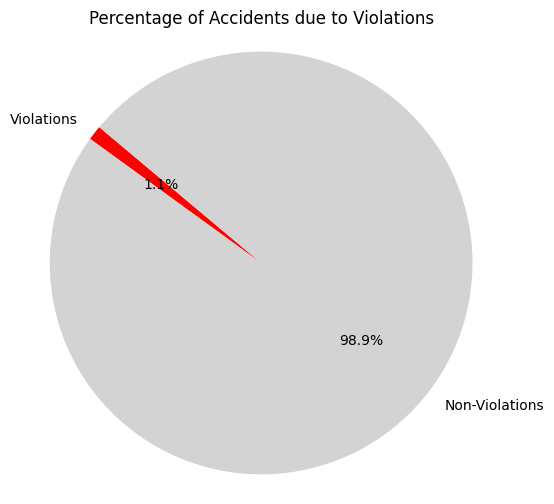

In [22]:
query = """
SELECT 
      ROUND(
			SUM(CASE 
                WHEN `Cause Subcategory` IN (
                    'Driving on Wrong side', 'Drunken Driving/ Consumption of alcohol and drug', 'Use of Mobile Phone'
                    'Jumping Red Light'
                ) THEN `Count` 
                ELSE 0 
            END
        ) * 100.0 / SUM(`Count`), 2)
      AS percent_with_violations
FROM road_accident;
"""
cur.execute(query)
data = cur.fetchone()  # one row only

violation_pct = data[0]
non_violation_pct = 100 - violation_pct

# Create a proper DataFrame for plotting
labels = ['Violations', 'Non-Violations']
sizes = [violation_pct, non_violation_pct]
colors = ['red', 'lightgray']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Accidents due to Violations')
plt.axis('equal')
plt.show()


                                                 # City-wise violation rate

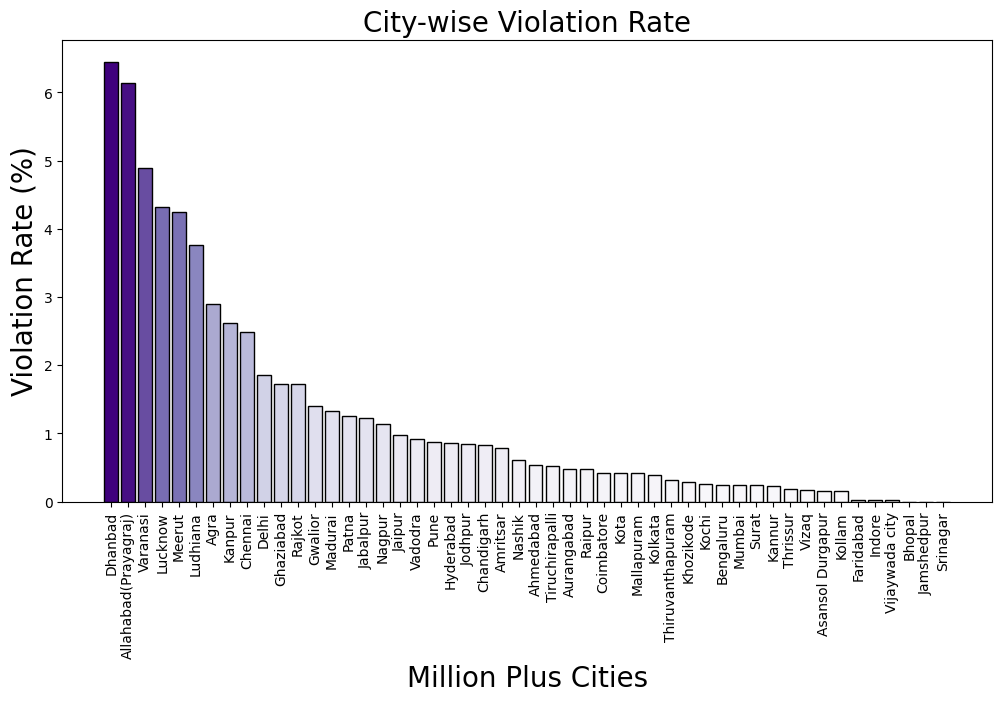

In [39]:
query = """SELECT 
           `Million Plus Cities`,
            SUM(`Count`) AS total_accidents,
            SUM(CASE 
               WHEN `Cause Subcategory` IN ('Driving on Wrong side', 'Drunken Driving/ Consumption of alcohol and drug', 'Use of Mobile Phone'
                    'Jumping Red Light'
              ) THEN `Count` ELSE 0 END) AS violations,
          ROUND(
          SUM(CASE 
          WHEN `Cause Subcategory` IN ('Driving on Wrong side', 'Drunken Driving/ Consumption of alcohol and drug', 'Use of Mobile Phone'
                    'Jumping Red Light'
              ) THEN `Count` ELSE 0 END) * 100.0 / SUM(`Count`), 
              2) AS violation_rate_percent
          FROM road_accident
          GROUP BY `Million Plus Cities`
          ORDER BY violation_rate_percent DESC;
         """
cur.execute(query)
data=cur.fetchall()

df = pd.DataFrame(data, columns=["Million Plus Cities", "Count", "violations", "violation_rate_percent"])
plt.figure(figsize=(12, 6))
# Sort by violation rate descending (or ascending)
df = df.sort_values(by="violation_rate_percent", ascending=False)

# Normalize colors based on violation rate
norm = plt.Normalize(df["violation_rate_percent"].min(), df["violation_rate_percent"].max())
colors = plt.cm.Purples(norm(df["violation_rate_percent"]))
plt.bar(df["Million Plus Cities"], df["violation_rate_percent"], color=colors, edgecolor='black')
plt.xlabel("Million Plus Cities", fontsize=20)
plt.ylabel("Violation Rate (%)", fontsize=20)
plt.xticks(rotation=90)
plt.title("City-wise Violation Rate", fontsize=20)
plt.show()

